In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import requests

import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re 
import pyLDAvis
import pyLDAvis.gensim_models

import matplotlib.pyplot as plt 
import pandas as pd

import requests
import json 
from collections import Counter
from nltk.corpus import stopwords    

In [4]:
# https://content.guardianapis.com/search?&api-key=test
apiKey = "58de53b7-a9ef-45d9-bf11-60072288147d"
searchContent = "trump"
link2 = "https://content.guardianapis.com/search?q=&api-key=test"
link =  (f"https://content.guardianapis.com/search?q={searchContent}&api-key={apiKey}")
response_API = requests.get(link)
#response_API = requests.get('https://api.covid19india.org/state_district_wise.json')
print(response_API.status_code)
data = response_API.text
parse_json = json.loads(data)
# results = parse_json['response']['results']
# count = 0
# for r in results:
#     count += 1
#     id = r['id']
#     print(id)
# print(count)

200


In [3]:
apiKey = "58de53b7-a9ef-45d9-bf11-60072288147d"
newsID = "football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction"
linkGetDetail = (f"https://content.guardianapis.com/{newsID}?show-fields=bodyText&api-key={apiKey}")
response_API = requests.get(linkGetDetail)
print(response_API.status_code)
data = response_API.text
parse_json = json.loads(data)
parse_json

200


{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 1,
  'content': {'id': 'football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction',
   'type': 'liveblog',
   'sectionId': 'football',
   'sectionName': 'Football',
   'webPublicationDate': '2022-11-30T21:12:09Z',
   'webTitle': 'Socceroos to face Argentina in World Cup knockouts after Australia’s famous win over Denmark – live reaction',
   'webUrl': 'https://www.theguardian.com/football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction',
   'apiUrl': 'https://content.guardianapis.com/football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction',
   'fields': {'bodyText': 'We’ve included scenes of fans celebrating in Melbourne and Sydney in an earlier post in this blog, though fans were up and at it across the country: This, from Adelaide this morning: For those just tuning in: Most newspa

In [5]:
parse_json["response"]

{'status': 'ok',
 'userTier': 'developer',
 'total': 1,
 'content': {'id': 'football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction',
  'type': 'liveblog',
  'sectionId': 'football',
  'sectionName': 'Football',
  'webPublicationDate': '2022-11-30T21:12:09Z',
  'webTitle': 'Socceroos to face Argentina in World Cup knockouts after Australia’s famous win over Denmark – live reaction',
  'webUrl': 'https://www.theguardian.com/football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction',
  'apiUrl': 'https://content.guardianapis.com/football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction',
  'fields': {'bodyText': 'We’ve included scenes of fans celebrating in Melbourne and Sydney in an earlier post in this blog, though fans were up and at it across the country: This, from Adelaide this morning: For those just tuning in: Most newspapers would have had to h

In [11]:
response = requests.get('https://example-files.online-convert.com/document/txt/example.txt')
someText = response.text
#someText = someText.values.tolist()
tweets = [t.split(',') for t in someText]
id2word = Dictionary(tweets)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in tweets]
print(corpus[:1])

# Build LDA model
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=10, 
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

#pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets, dictionary=id2word, coherence='c_v')
#coherence_lda = coherence_model_lda.get_coherence()

pyLDAvis.enable_notebook()
d = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
#d = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(d)
# visualization = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
#visualization


[[(0, 1)]]

Perplexity:  -3.5592368883379764


c:\Users\Willi\miniconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [9]:
id2word.keys

<bound method Dictionary.keys of <gensim.corpora.dictionary.Dictionary object at 0x000001BBBD38ED30>>

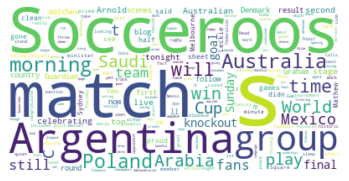

(str, None)

In [19]:
response = requests.get('https://example-files.online-convert.com/document/txt/example.txt')
someText = response.text


def draw_wordcloud(someText):
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(someText)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
type(someText), draw_wordcloud(someText)


In [20]:
def get_wordCount(text):
    stop_words = set(stopwords.words('english'))

    for char in '-.,\n':
        text=text.replace(char,' ')
    text = text.lower()
    word_list = text.split()
    word_list = [w for w in word_list if not w in stop_words]

    wordCount = Counter(word_list).most_common()
    return wordCount
response = requests.get('https://example-files.online-convert.com/document/txt/example.txt')
someText = response.text

get_wordCount(someText)

[('0', 19),
 ('match', 19),
 ('group', 17),
 ('socceroos', 17),
 ('argentina', 16),
 ('poland', 13),
 ('time', 12),
 ('morning', 11),
 ('australia', 10),
 ('saudi', 10),
 ('arabia', 10),
 ('world', 10),
 ('win', 10),
 ('play', 9),
 ('cup', 8),
 ('mexico', 8),
 ('still', 7),
 ('team', 7),
 ('fans', 6),
 ('knockout', 6),
 ('sunday', 6),
 ('it’s', 6),
 ('celebrating', 5),
 ('top', 5),
 ('c', 5),
 ('goal', 5),
 ('tonight', 5),
 ('live', 5),
 ('scenes', 4),
 ('blog', 4),
 ('graham', 4),
 ('round', 4),
 ('16', 4),
 ('denmark', 4),
 ('first', 4),
 ('matches', 4),
 ('australia’s', 4),
 ('final', 4),
 ('i’m', 4),
 ('follow', 4),
 ('here:', 4),
 ('second', 4),
 ('stages', 4),
 ('melbourne', 3),
 ('sydney', 3),
 ('gone', 3),
 ('australian', 3),
 ('2', 3),
 ('could', 3),
 ('two', 3),
 ('games', 3),
 ('clean', 3),
 ('like', 3),
 ('arnold', 3),
 ('see', 3),
 ('proud', 3),
 ('”', 3),
 ('c’s', 3),
 ('guardian’s', 3),
 ('half', 3),
 ('results', 3),
 ('mathew', 3),
 ('didn’t', 3),
 ('we’ll', 3),
 ('cele

In [ ]:
# # python 3.9.5
# #pip3 install gensim==3.8.2
# import pandas as pd
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# import requests

# #install nltk

# from sklearn import metrics
# #from sklearn.model_selection import GridSearchCV
# from sklearn.feature_extraction.text import  CountVectorizer #bag-of-words vectorizer 
# from sklearn.decomposition import LatentDirichletAllocation #package for LDA

# import gensim
# import gensim.corpora as corpora
# from gensim.corpora import Dictionary
# from gensim.models.coherencemodel import CoherenceModel
# from gensim.models.ldamodel import LdaModel

# from pprint import pprint

# #import spacy

# import pickle
# import re 
# import pyLDAvis

# import pyLDAvis.gensim_models as gensimvis
# #from pyLDAvis import gensim

# import matplotlib.pyplot as plt 
# import pandas as pd

# #%run ./Text_Normalization_Function.ipynb